# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

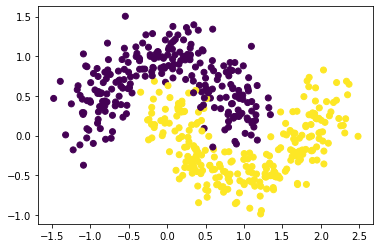

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic Regression accuracy:  0.88
SVM accuracy:  0.8866666666666667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


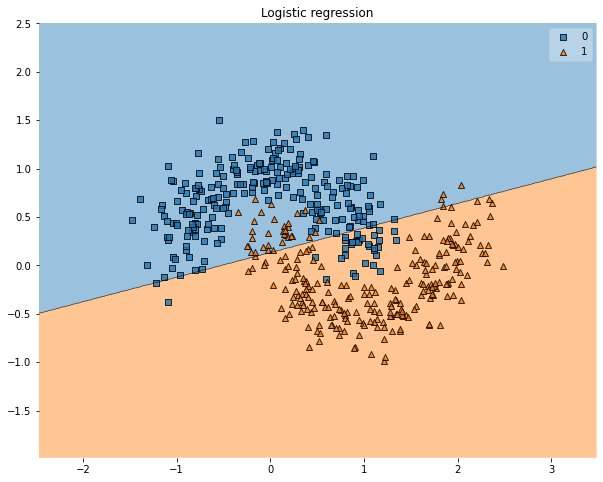

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM')

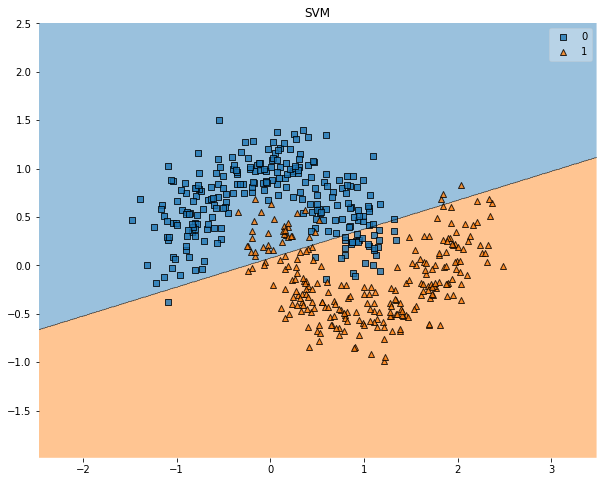

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty = 'l2', C = 10000) # add some params
svm = SVC(kernel='linear', C = 100) # here too


### YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3)

lr.fit(X_train,y_train)
svm.fit(X_train,y_train)

print("Logistic Regression accuracy: ", lr.score(X_test,y_test))
print("SVM accuracy: ", svm.score(X_test,y_test))

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = lr)
plt.title("Logistic regression")
plt.show()

fig = plt.figure(figsize=(10, 8))

fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = svm)
plt.title("SVM")


## 1.2 Kernel tirck

![keep-calm](https://github.com/girafe-ai/ml-mipt/blob/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

best params for  ['linear']  is {'C': 100.0, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


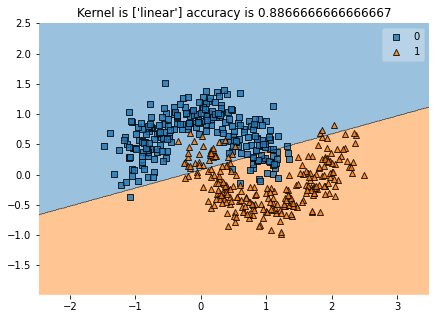

best params for  ['poly']  is {'C': 10.0, 'degree': 3, 'kernel': 'poly'}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


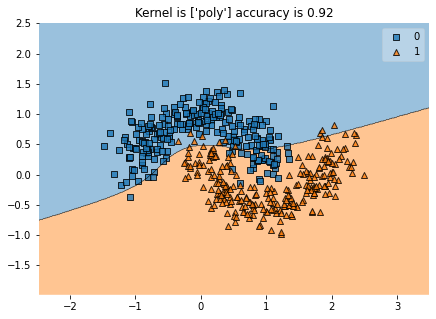

best params for  ['rbf']  is {'C': 100.0, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


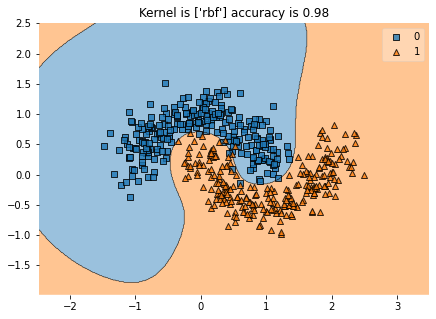

best params for  ['sigmoid']  is {'C': 0.01, 'kernel': 'sigmoid'}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


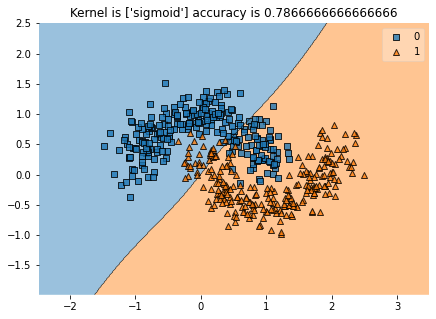

In [18]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


params = []
params.append({'kernel': ['linear'], 'C': list(np.power(10.0, np.arange(-10, 6))) })
params.append({'kernel': ['poly'], 'C': list(np.power(10.0, np.arange(-10, 3))) , 'degree' : [3,4,5,6,7] })
params.append({'kernel': [ 'rbf'], 'C': list(np.power(10.0, np.arange(-10, 6))) })
params.append({'kernel': [ 'sigmoid'], 'C': list(np.power(10.0, np.arange(-10, 6))) })
for param in params:
  model = GridSearchCV(SVC(),param,refit = True)
  model.fit(X_train, y_train)
  fig = plt.figure(figsize=(7, 5))
  fig = plot_decision_regions(X = moons_points, y = moons_labels, clf = model)
  title = "Kernel is " + str(param['kernel']) +  " accuracy is " + str( accuracy_score(y_test,model.predict(X_test)))
  plt.title(title)
  print("best params for ",param['kernel'], ' is', model.best_params_ )
  plt.show()


$\textbf{Conclusion:}$ Any kernel other than the sigmoid of this method performs better than logistic regression or linear kernel. The best kernel for this data is 'rbf'. The best degree is 3. Most of the polynomials of other degrees in the center are similar to a straight line, which does not describe the data well. In the case of rbf, when the parameter c decreases or increases, the boundary begins to strongly surround one class, discarding its parts. In the case of a sigmoid, with a parameter c <0.01, the sigmoid selects the entire plane, with a parameter c> 0.01, the boundary turns into a wave

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


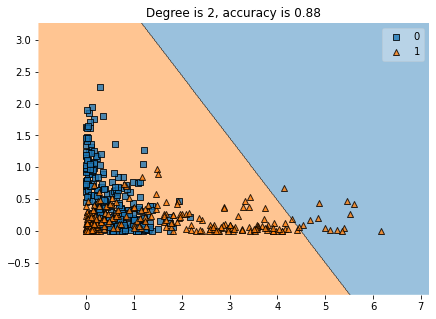

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


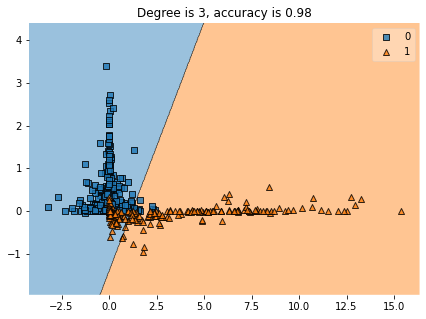

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


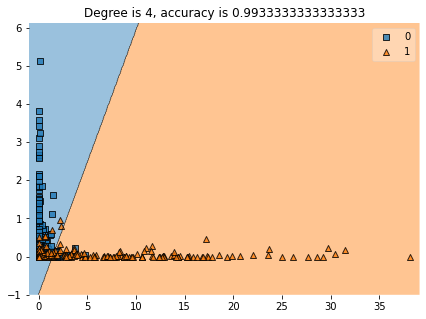

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


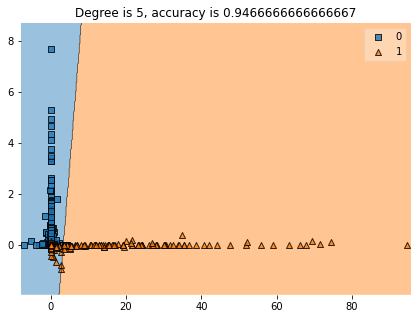

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


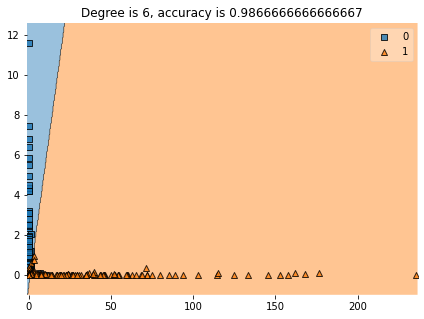

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


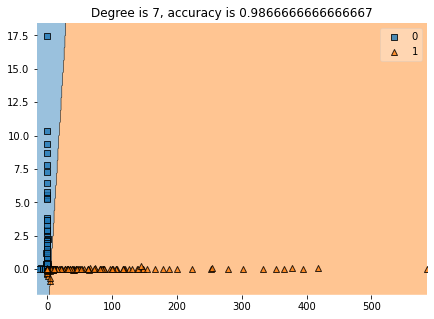

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


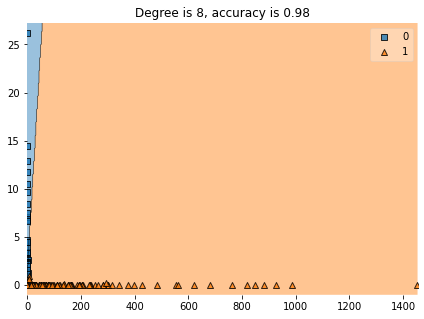

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


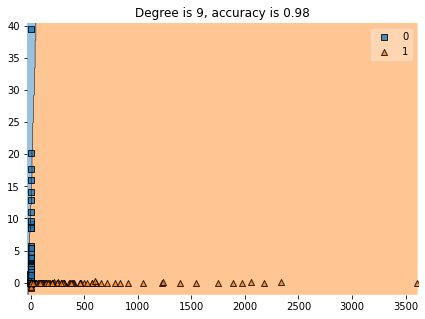

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


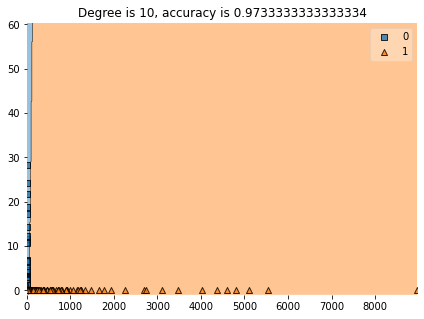

In [57]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE

degrees = np.linspace(2,10,9).astype(int) #set the degree by which we will iterate
for i in range(len(degrees)):
  poly = PolynomialFeatures(degrees[i])   
  X_transf = poly.fit_transform(moons_points)
  feature_1 = X_transf.shape[1]- 1 - degrees[i] #feature number that will be plotted along the x-axis
  feature_2 = X_transf.shape[1]- 1  #feature number that will be plotted along the y-axis
  X_train_transf, X_test_transf, y_train, y_test = train_test_split(X_transf, moons_labels, test_size=0.3)  
  model = LogisticRegression(C = 100, max_iter = 500) 
  model.fit(X_train_transf,y_train) 
  fig = plt.figure(figsize=(7, 5))
  values = {}
  ranges = {}
  for j in range(X_transf.shape[1]):  #This is needed to build plots.
    if j!= feature_1 and j!=feature_2:    
      values.update({j: np.mean(X_transf[...,j])})
      ranges.update({j: np.max(X_transf[...,j])-np.min(X_train_transf[...,j]) + 1})
  fig = plot_decision_regions(X = X_transf, y = moons_labels, clf = model,feature_index=[feature_1,feature_2] ,filler_feature_values=values,filler_feature_ranges=ranges )
  title = "Degree is " + str(degrees[i]) +  ", accuracy is " + str( accuracy_score(y_test,model.predict(X_test_transf)))
  plt.title(title)
  plt.show()


$\textbf{Conclusion:}$ Depending on the launch of the cell, the best accuracy has polynom of 3 or 4. It is the same as in the poly kernel for SVM, but it has the same accuracy as rbf kernel. Boundaries remain straight in the feature space with maximum degrees  

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

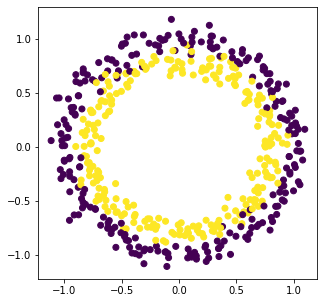

In [58]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

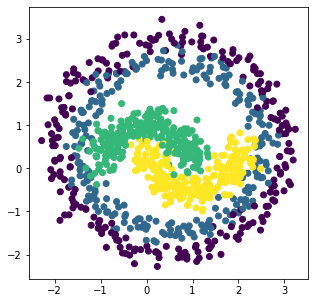

In [59]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

best params for  ['rbf']  is {'C': 100.0, 'kernel': 'rbf'}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


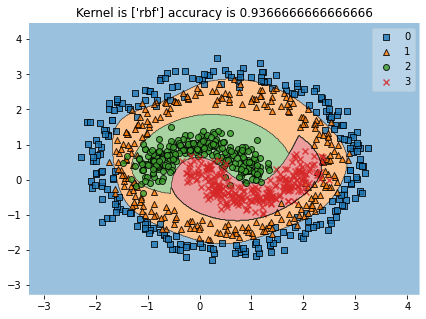

In [70]:
### YOUR CODE HERE


X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3)

param = {'kernel': ['rbf'], 'C': list(np.power(10.0, np.arange(-5, 5))) }
model = GridSearchCV(SVC(),param,refit = True)
model.fit(X_train, y_train)
fig = plt.figure(figsize=(7, 5))
fig = plot_decision_regions(X = points, y = labels, clf = model)
title = "Kernel is " + str(param['kernel']) +  " accuracy is " + str( accuracy_score(y_test,model.predict(X_test)))
plt.title(title)
print("best params for ",param['kernel'], ' is', model.best_params_ )
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


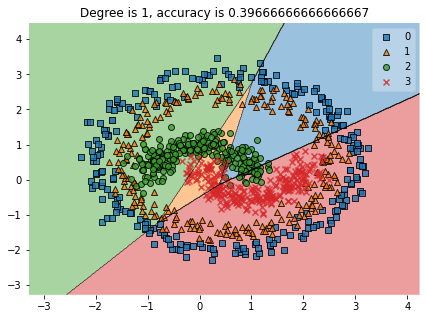

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


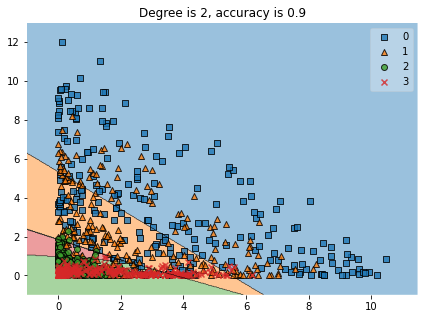

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


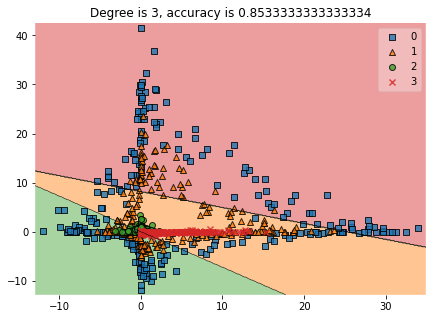

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


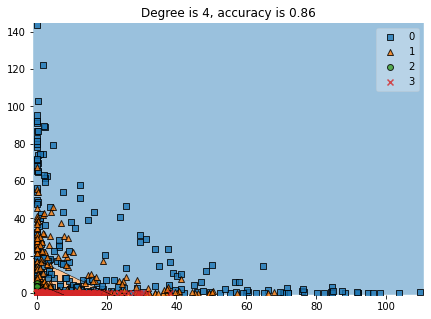

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


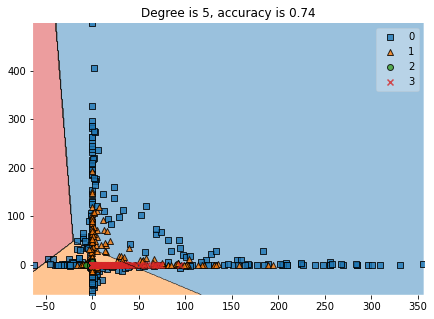

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


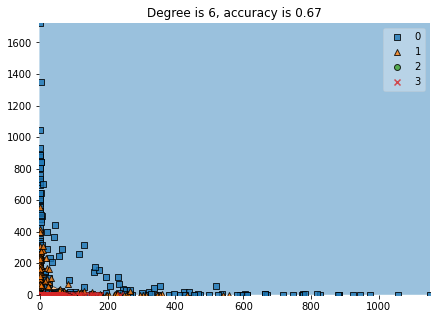

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


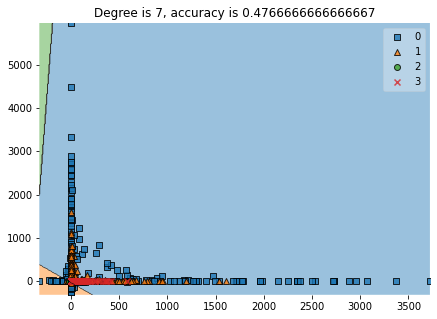

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


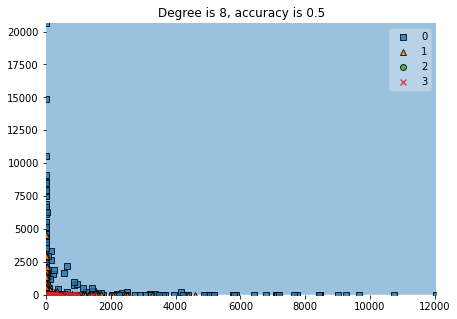

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


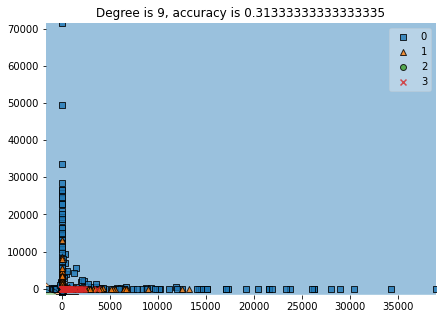

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


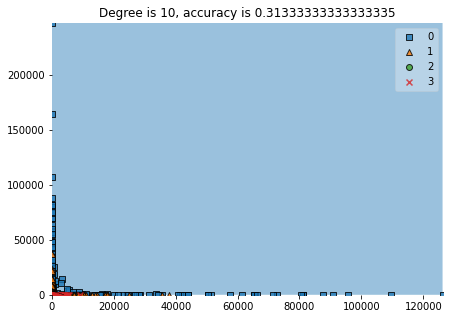

In [76]:
degrees = np.linspace(1,10,10).astype(int) #set the degree by which we will iterate
for i in range(len(degrees)):
  poly = PolynomialFeatures(degrees[i])   
  X_transf = poly.fit_transform(points)
  feature_1 = X_transf.shape[1]- 1 - degrees[i] #feature number that will be plotted along the x-axis
  feature_2 = X_transf.shape[1]- 1  #feature number that will be plotted along the y-axis
  X_train_transf, X_test_transf, y_train, y_test = train_test_split(X_transf, labels, test_size=0.3)  
  model = LogisticRegression(multi_class='multinomial', solver='saga',C = 1000, max_iter = 500) 
  model.fit(X_train_transf,y_train) 
  fig = plt.figure(figsize=(7, 5))
  values = {}
  ranges = {}
  for j in range(X_transf.shape[1]):  #This is needed to build plots.
    if j!= feature_1 and j!=feature_2:    
      values.update({j: np.mean(X_transf[...,j])})
      ranges.update({j: np.max(X_transf[...,j])-np.min(X_train_transf[...,j]) + 1})
  fig = plot_decision_regions(X = X_transf, y = labels, clf = model,feature_index=[feature_1,feature_2] ,filler_feature_values=values,filler_feature_ranges=ranges )
  title = "Degree is " + str(degrees[i]) +  ", accuracy is " + str( accuracy_score(y_test,model.predict(X_test_transf)))
  plt.title(title)
  plt.show()

$\textbf{Conclusion:}$ As the accuracy score shows the best estimator for a given dataset is an SVM with an rbf core. Logistic regression trained on transformed data using PolinomialFeature with a deegre of 2 or 3 gives almost the same results. Logistic regression accuracy approachs to 0.9. All of the tools have the enough accuracy, but I prefer to use the SVM on this dataset because of it's nonlinear boundaries.